In [17]:
import numpy as np
import os
import imageio
import torchvision.transforms as transforms
import torch

In [3]:
folder='/home/maria/imagenet/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01694178'

len(os.listdir(folder))

1300

In [26]:
resize_transform = transforms.Resize((224, 224))

images=[]
for file in os.listdir(folder):
    try:
        image = torch.tensor(imageio.imread(folder+'/'+file)).permute(2, 0, 1)
        resized_image = resize_transform(image).flatten().numpy()
        #print(image.shape, resized_image.shape)
        images.append(resized_image)
    except:
        image = torch.tensor(imageio.imread(folder+'/'+file))
        print(image.shape)

/tmp/ipykernel_3942506/1682772981.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = torch.tensor(imageio.imread(folder+'/'+file)).permute(2, 0, 1)
/tmp/ipykernel_3942506/1682772981.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = torch.tensor(imageio.imread(folder+'/'+file))


torch.Size([391, 600])


In [27]:
images=np.array(images)
print(images.shape)

(1299, 150528)


/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1299 samples in 0.053s...
[t-SNE] Computed neighbors for 1299 samples in 9.393s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1299
[t-SNE] Computed conditional probabilities for sample 1299 / 1299
[t-SNE] Mean sigma: 6703.921016
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.655449
[t-SNE] KL divergence after 300 iterations: 1.781657


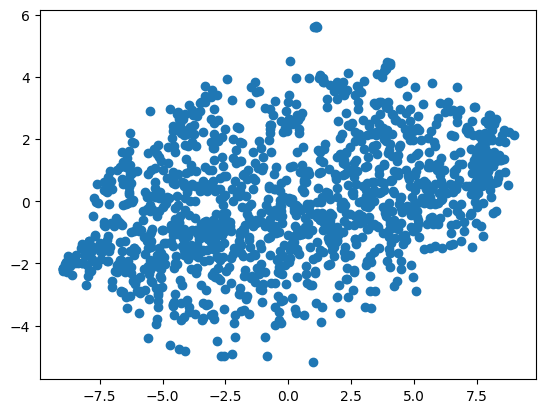

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_results = tsne.fit_transform(images)

import matplotlib.pyplot as plt

plt.scatter(tsne_results[:,0], tsne_results[:,1])